In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


# import libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv', encoding='latin1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.shape

(1303, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# data preprocessing

In [7]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# convert Ram and Weight features to numerical 

In [10]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=pd.to_numeric(df['Ram'],errors='coerce')
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [12]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
698,706,Toshiba,Portege Z30T-C-133,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.36,1877.00
1093,1108,Dell,Inspiron 5370,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,AMD Radeon 530,Windows 10,1.40,818.35
913,926,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,1018.99
157,160,Asus,ZenBook Flip,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,1315.00
951,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1775.00


In [13]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [14]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

# convert TouchScreen feature to numeric

In [15]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: >

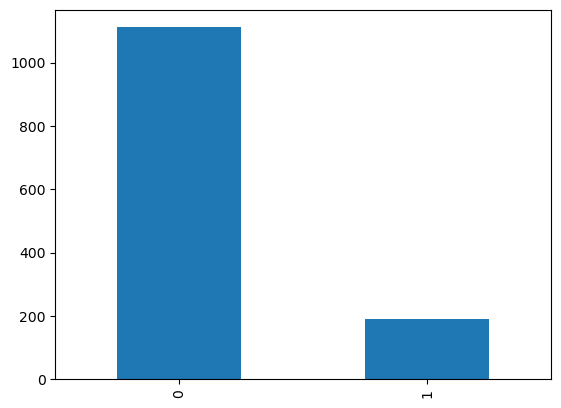

In [16]:
df['TouchScreen'].value_counts().plot(kind='bar')

In [17]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


# split ScreenResolution to Width and Height columns to convert it to numeric

In [18]:
# Split ScreenResolution column into two columns
df[['Width', 'Height']] = df['ScreenResolution'].str.split('x', expand=True)

In [19]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,IPS Panel Retina Display 2560,1600


# remove words from Width feature to convert it to numeric

In [20]:
df['Width']=df['Width'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [21]:
df['Width']= pd.to_numeric(df['Width'])
df['Height']= pd.to_numeric(df['Height'])

In [22]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
 13  TouchScreen       1303 non-null   int64  
 14  Width             1303 non-null   int64  
 15  Height            1303 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory 

# ****EDA

#  the count for each type for each company

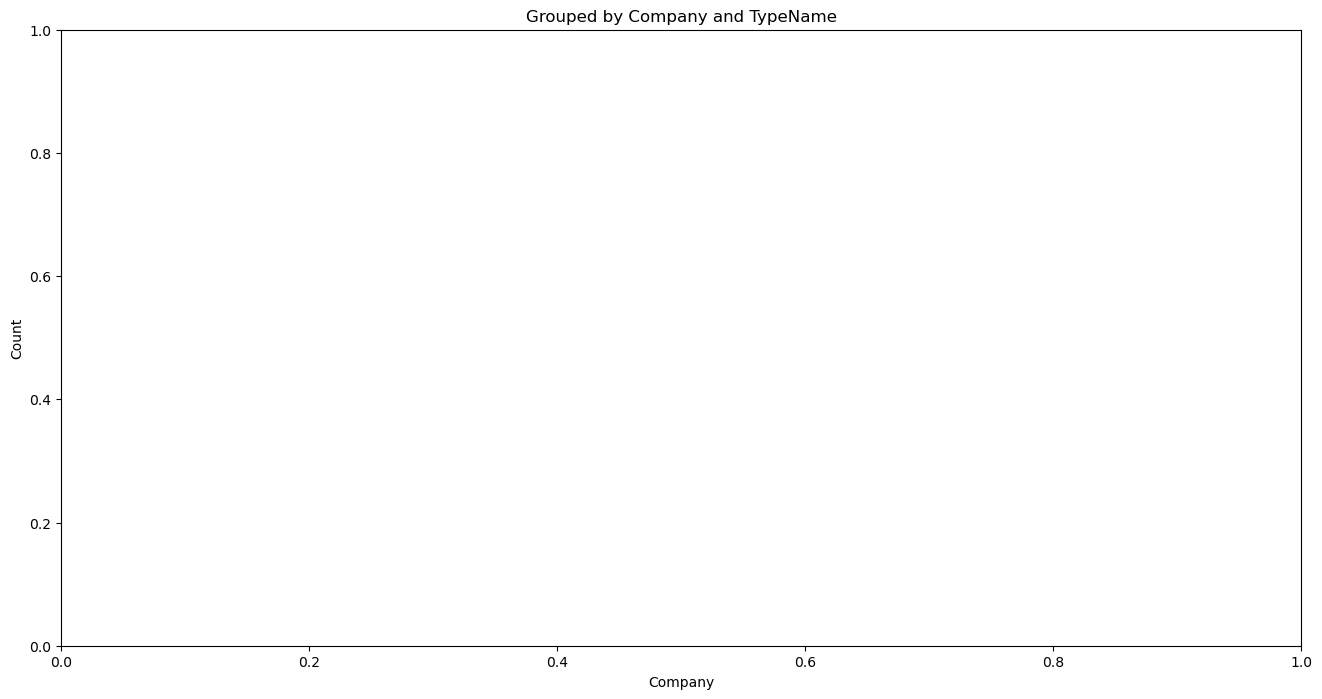

In [24]:
plt.figure(figsize=(16,8))
grouped_df = df.groupby(['Company', 'TypeName']).size().reset_index(name='Count')
fig=px.bar(x='Company', y='Count', color='TypeName', data_frame=grouped_df)
plt.title('Grouped by Company and TypeName')
plt.xlabel('Company')
plt.ylabel('Count')
fig.show()

**MSI Company intersting with Gaming type and APPLE Company intersting with Ultrabook and most of other comanies intersting with Notebook**

# the count for each operation system for each company

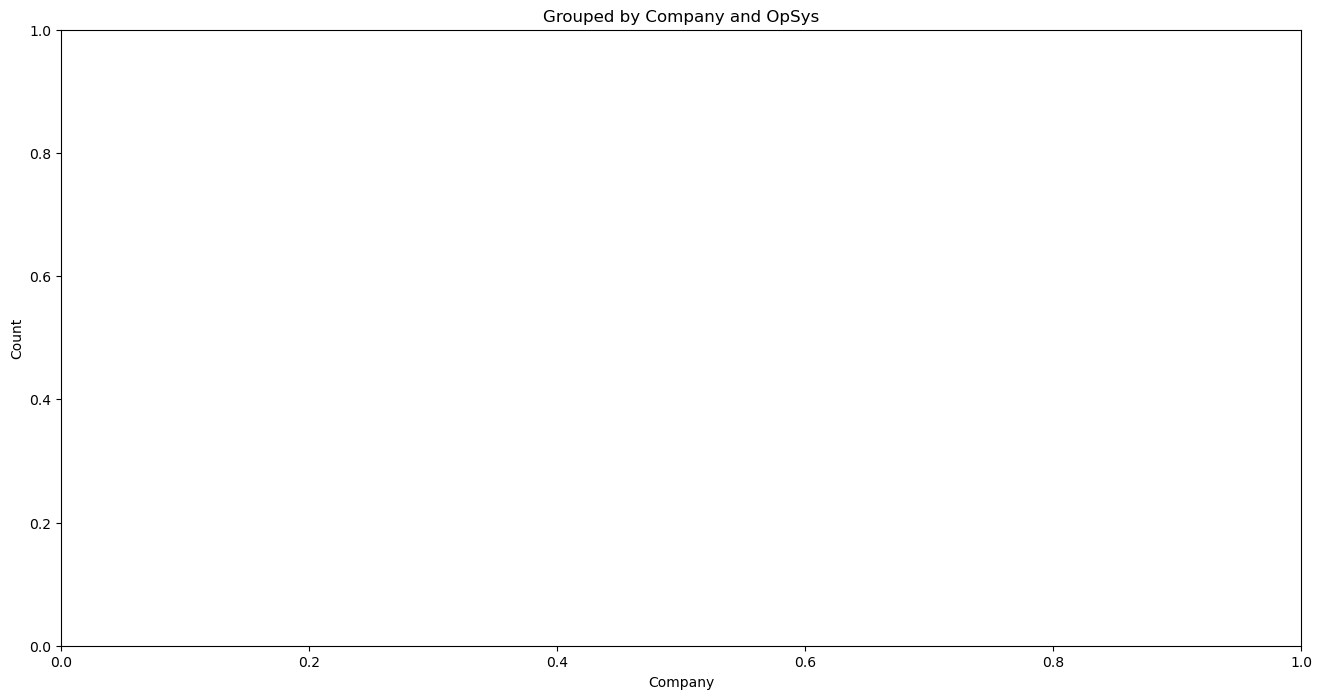

In [25]:
plt.figure(figsize=(16,8))
grouped=df.groupby(['Company','OpSys']).size().reset_index(name='Count')
fig=px.bar(x='Company',y='Count',color='OpSys',data_frame=grouped)
plt.title('Grouped by Company and OpSys')
plt.xlabel('Company')
plt.ylabel('Count')
fig.show()

**** more than 90% for operation system for most of companies is windows 10 except APPLE is Mac OS**** 

# the count for Size Of RAM for each company

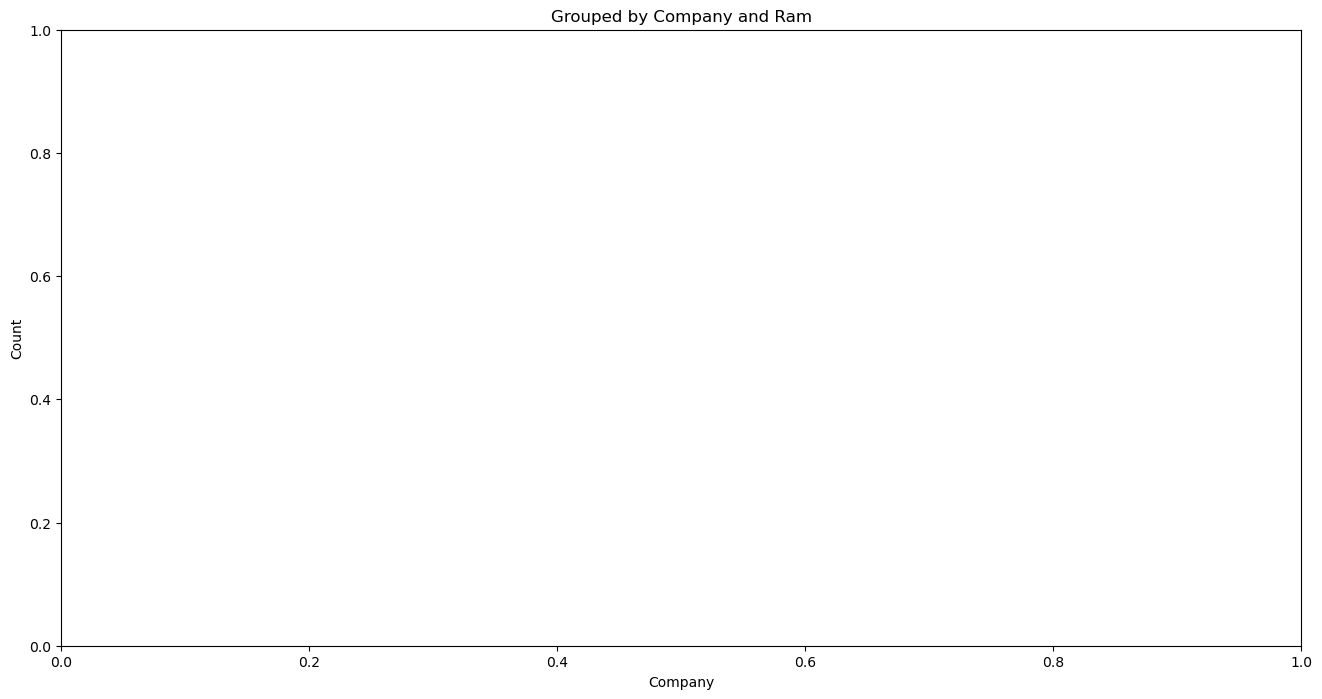

In [26]:
plt.figure(figsize=(16,8))
grouped_df = df.groupby(['Company', 'Ram']).size().reset_index(name='Count')
fig=px.bar(x='Company', y='Count', color='Ram', data_frame=grouped_df)
plt.title('Grouped by Company and Ram')
plt.xlabel('Company')
plt.ylabel('Count')
fig.show()

**** most of devices for all companies is 8 RAM**** 

# count of usable RAM in each type

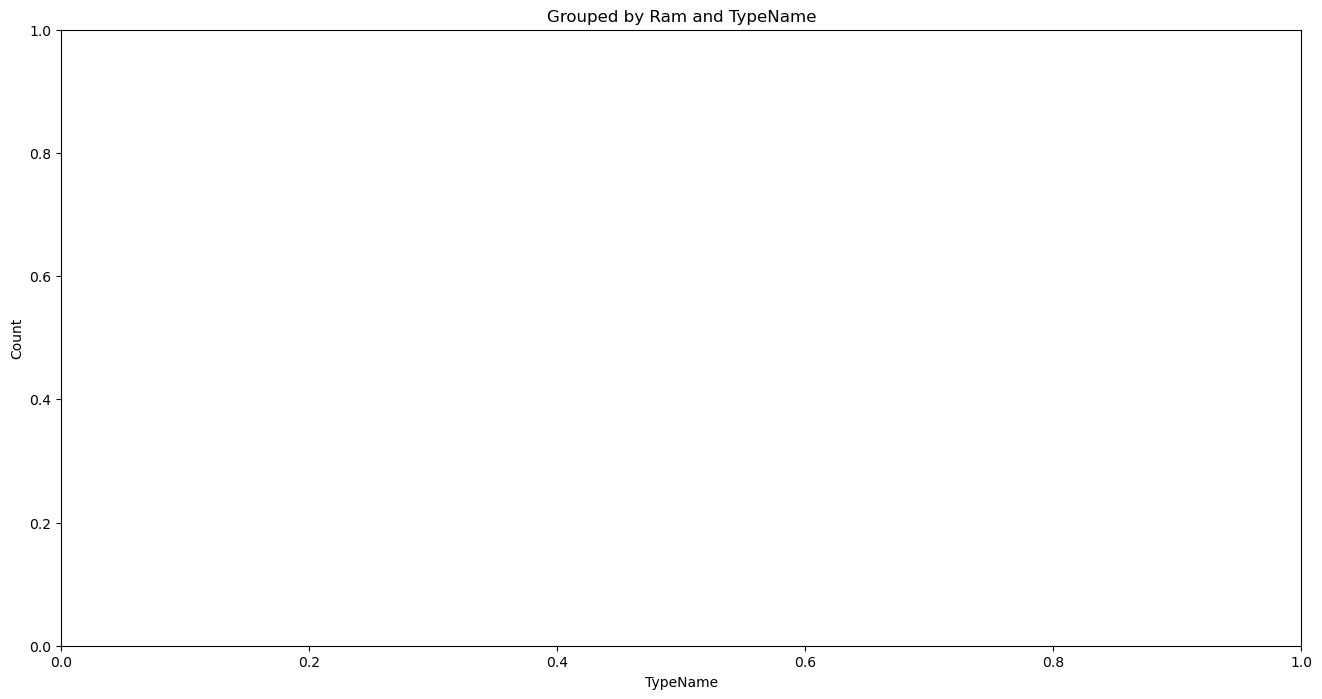

In [27]:
plt.figure(figsize=(16,8))
grouped_df = df.groupby(['Ram', 'TypeName']).size().reset_index(name='Count')
fig=px.bar(x='TypeName', y='Count', color='Ram', data_frame=grouped_df)
plt.title('Grouped by Ram and TypeName')
plt.xlabel('TypeName')
plt.ylabel('Count')
fig.show()

**only gaming laptops need high RAM more than 8******

# prices distribution

In [28]:
fig = px.histogram(df, x='Price_euros')
fig.show()

**the range of prices for most of laptops is between 200-1500 euros******

# distribution of companies production

In [29]:
fig=px.histogram(df,x='Company')
fig.show()

**more than 66% of companies production in the sample are only 3 companies (Lenovo & Dell & HP)******

# mean price for each type

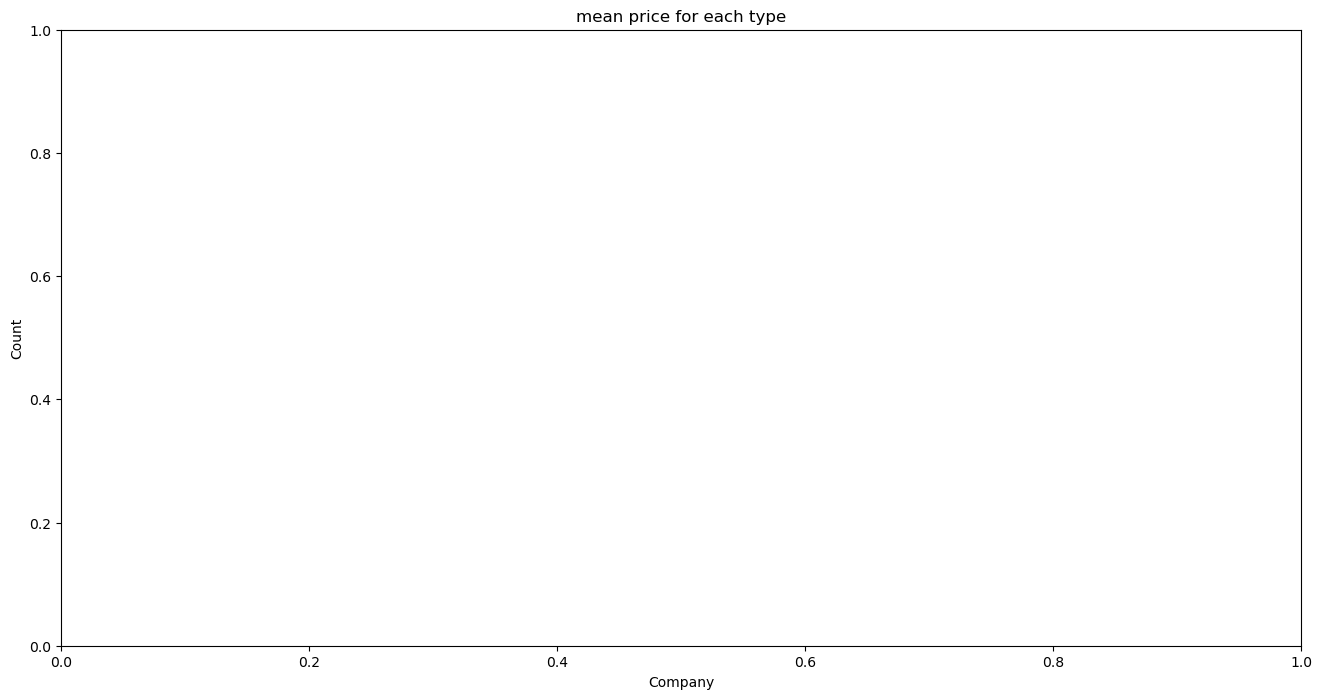

In [30]:
plt.figure(figsize=(16,8))
grouped_df = df.groupby('TypeName')['Price_euros'].mean().reset_index()
fig=px.bar(x='TypeName', y='Price_euros',data_frame=grouped_df)
plt.title('mean price for each type')
plt.xlabel('Company')
plt.ylabel('Count')
fig.show()

**Workstation is the highest mean price******

In [31]:
df.drop('ScreenResolution',axis=1,inplace=True)

# remove words and split the types from CPU feature to convert it to numeric

In [32]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [33]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Name
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,Intel Core i5


In [34]:
def fetch_processor(text):
    if text=='Intel Core i5' or text=='Intel Core i7' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

In [35]:
df['Cpu_Brand']=df['Cpu_Name'].apply(fetch_processor)

In [36]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Name,Cpu_Brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600,Intel Core i5,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,Intel Core i5,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,Intel Core i5,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,2880,1800,Intel Core i7,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,2560,1600,Intel Core i5,Intel Core i5


<Axes: >

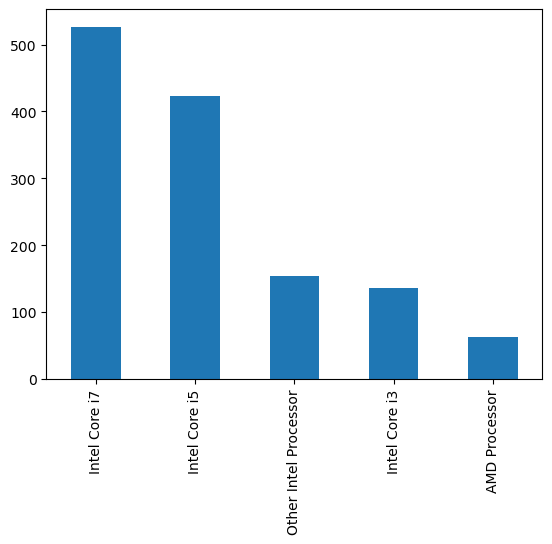

In [37]:
df['Cpu_Brand'].value_counts().plot(kind='bar')

# mean price for each CPU type

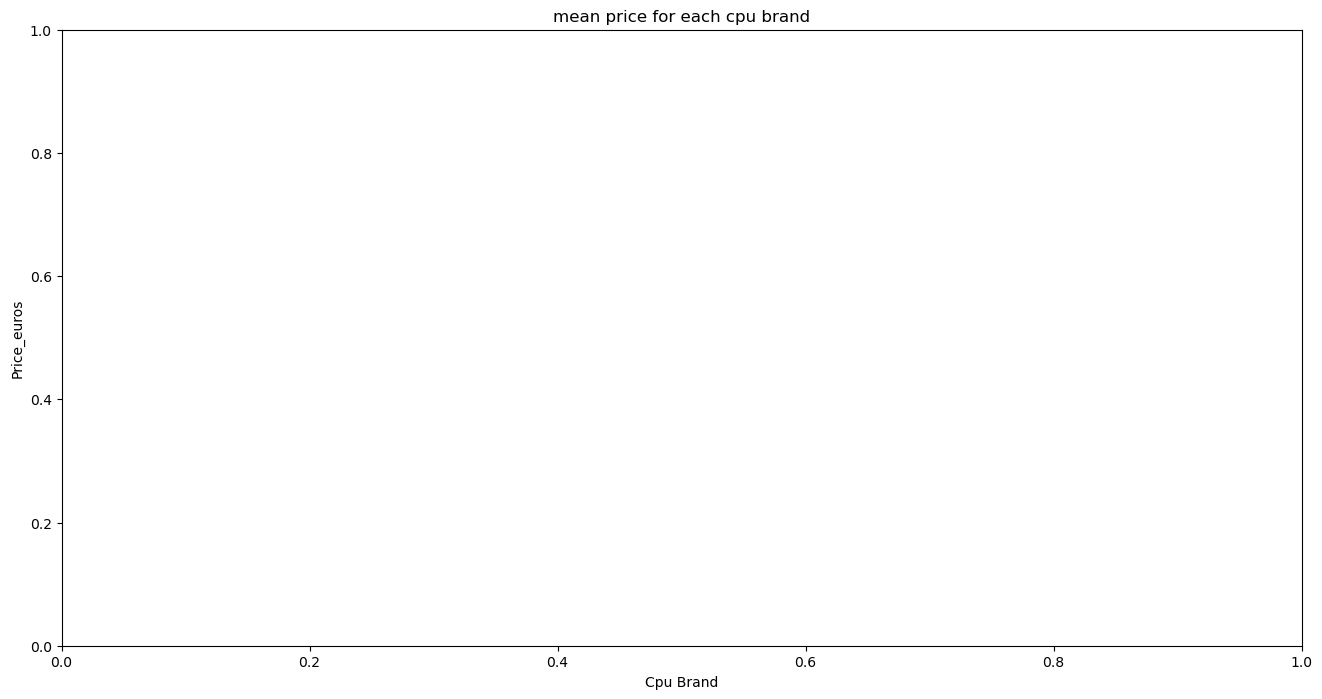

In [38]:
plt.figure(figsize=(16,8))
grouped_df = df.groupby('Cpu_Brand')['Price_euros'].mean().reset_index()
fig=px.bar(x='Cpu_Brand', y='Price_euros',data_frame=grouped_df)
plt.title('mean price for each cpu brand')
plt.xlabel('Cpu Brand')
plt.ylabel('Price_euros')
fig.show()

**intel core i7 is the highest mean price**

In [39]:
df.drop(['Cpu_Name','Cpu'],axis=1,inplace=True)

In [40]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,Intel Core i5


# preprocessing for Memory feature and split the types

In [41]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [42]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
366,372,Dell,Inspiron 5770,Notebook,17.3,8,128 SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.80,1085.00,0,1920,1080,Intel Core i5,1000,128,0,0
353,359,HP,Zbook 15,Workstation,15.6,8,256 SSD,Nvidia Quadro M1200,Windows 10,2.60,1738.27,0,1920,1080,Intel Core i7,0,256,0,0
723,731,Dell,Alienware 17,Gaming,17.3,32,1000 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40,0,3840,2160,Intel Core i7,1000,1000,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,1366,768,Other Intel Processor,0,0,0,64
807,816,HP,15-ba043na (A12-9700P/8GB/2TB/W10),Notebook,15.6,8,2000 HDD,AMD Radeon R7 Graphics,Windows 10,2.04,629.00,0,1366,768,AMD Processor,2000,0,0,0


In [43]:
df.drop(columns=['Memory'],inplace=True)

In [44]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [45]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [46]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Gpu_Brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600,Intel Core i5,0,128,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,Intel Core i5,0,0,Intel
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,Intel Core i5,0,256,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,2880,1800,Intel Core i7,0,512,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,2560,1600,Intel Core i5,0,256,Intel


In [47]:
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [48]:
df = df[df['Gpu_Brand'] != 'ARM']

In [49]:
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

In [50]:
df.drop(columns=['Gpu'],inplace=True)

# gathering all windows types in one variable and all mac types in one variable

In [51]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [52]:
df['os'] = df['OpSys'].apply(cat_os)

In [53]:
df.drop(columns=['OpSys'],inplace=True)

In [54]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,0,2560,1600,Intel Core i5,0,128,Intel,Mac
1,2,Apple,Macbook Air,Ultrabook,13.3,8,1.34,898.94,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,3,HP,250 G6,Notebook,15.6,8,1.86,575.00,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,1.83,2537.45,0,2880,1800,Intel Core i7,0,512,AMD,Mac
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1803.60,0,2560,1600,Intel Core i5,0,256,Intel,Mac


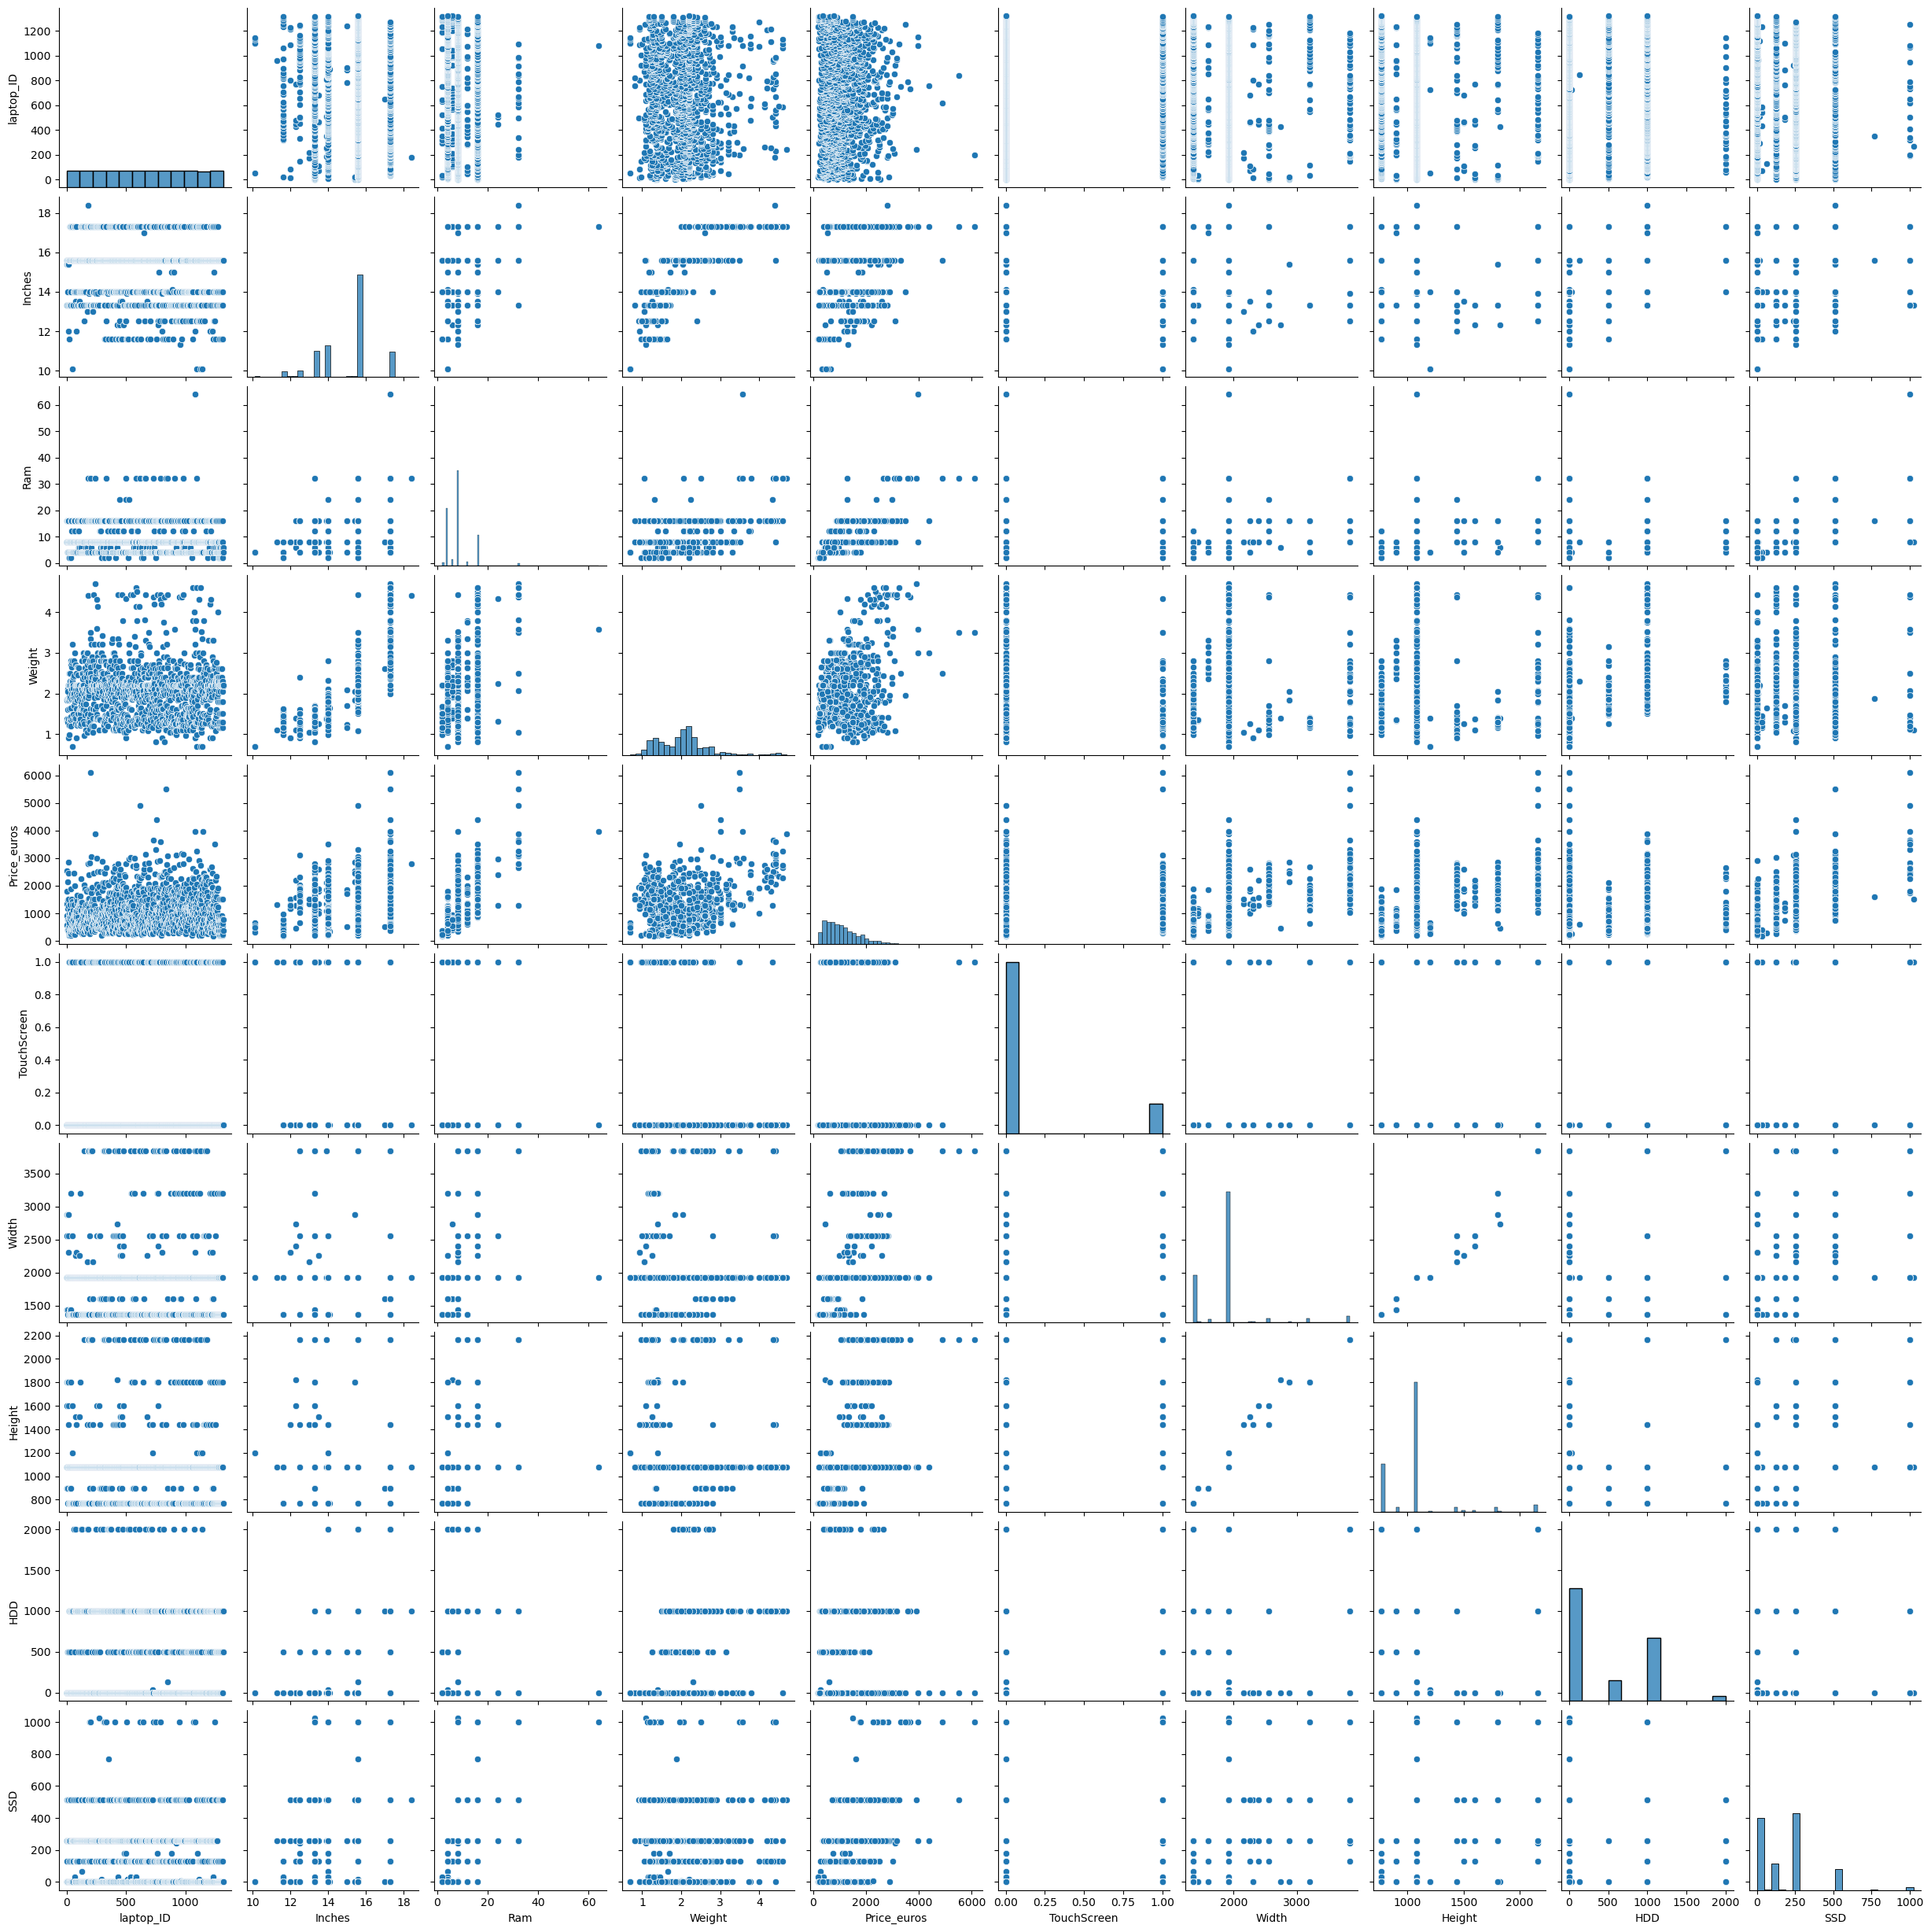

In [55]:
sns.pairplot(df)

# data correlations

In [56]:
df.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros,TouchScreen,Width,Height,HDD,SSD
laptop_ID,1.000000,-0.085876,-0.027683,-0.010335,0.068632,0.049044,-0.044061,-0.056090,-0.020837,-0.057783
Inches,-0.085876,1.000000,0.237129,0.827397,0.067329,-0.359514,-0.069875,-0.092934,0.530468,-0.109364
Ram,-0.027683,0.237129,1.000000,0.383362,0.742905,0.118875,0.434095,0.426357,0.095808,0.603379
Weight,-0.010335,0.827397,0.383362,1.000000,0.209867,-0.293004,-0.031866,-0.052041,0.514147,-0.063818
Price_euros,0.068632,0.067329,0.742905,0.209867,1.000000,0.192917,0.557369,0.554591,-0.096891,0.670660
TouchScreen,0.049044,-0.359514,0.118875,-0.293004,0.192917,1.000000,0.350097,0.355756,-0.208766,0.257577
Width,-0.044061,-0.069875,0.434095,-0.031866,0.557369,0.350097,1.000000,0.994480,-0.124872,0.528655
Height,-0.056090,-0.092934,0.426357,-0.052041,0.554591,0.355756,0.994480,1.000000,-0.136141,0.521017
HDD,-0.020837,0.530468,0.095808,0.514147,-0.096891,-0.208766,-0.124872,-0.136141,1.000000,-0.400750
SSD,-0.057783,-0.109364,0.603379,-0.063818,0.670660,0.257577,0.528655,0.521017,-0.400750,1.000000


<Axes: >

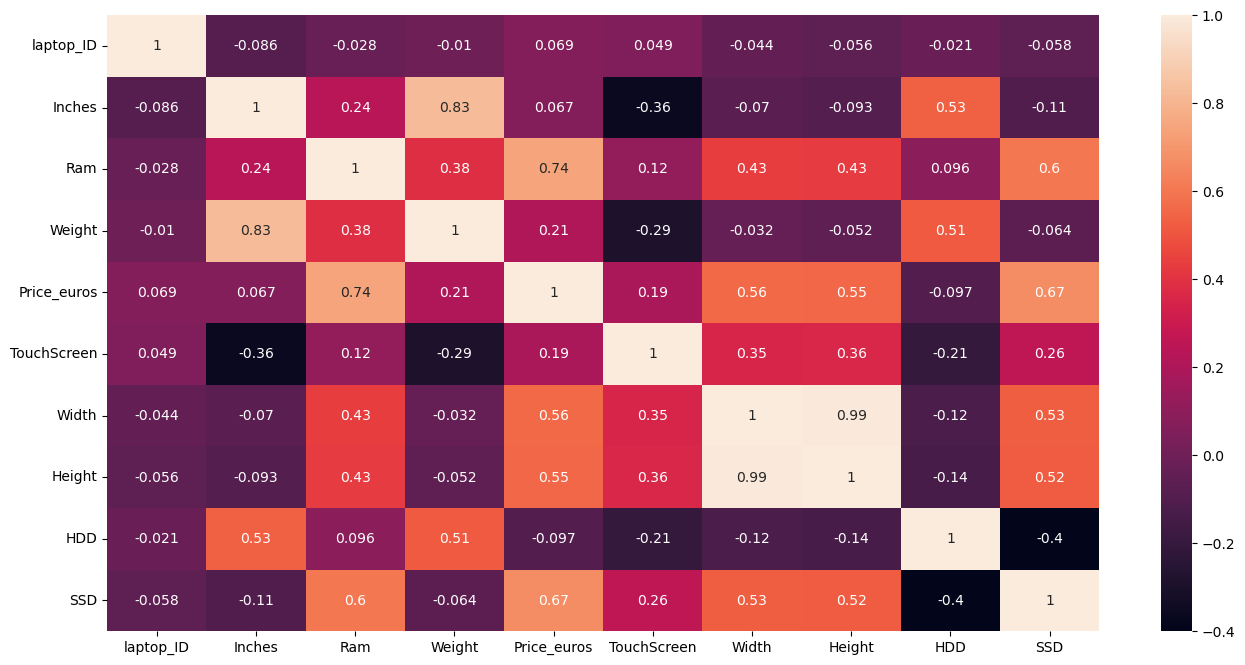

In [57]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

# RAM is the most important feature that effect in the price

In [58]:
df.drop('laptop_ID',axis=1,inplace=True)

In [59]:
df.drop('Product',axis=1,inplace=True)

In [60]:
data=df.copy()

In [61]:
data.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,0,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,898.94,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,575.00,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,2537.45,0,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,1803.60,0,2560,1600,Intel Core i5,0,256,Intel,Mac


# split the data to train and test

In [62]:
X=data.drop('Price_euros',axis=1)
y=data['Price_euros']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [65]:
data.head(1)

,Company,TypeName,Inches,Ram,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,0,2560,1600,Intel Core i5,0,128,Intel,Mac


In [66]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,0,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,898.94,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,575.00,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,2537.45,0,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,1803.60,0,2560,1600,Intel Core i5,0,256,Intel,Mac


# training the model with more than one algorithm

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=500,max_depth=5,learning_rate=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred1 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred1))
print('MAE',mean_absolute_error(y_test,y_pred1))

R2 score 0.8503400975471023
MAE 178.02429987881834


In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=350)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred2 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred2))
print('MAE',mean_absolute_error(y_test,y_pred2))

R2 score 0.8258191441496221
MAE 191.1360179204351


In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=17,min_samples_split=2)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred3 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred3))
print('MAE',mean_absolute_error(y_test,y_pred3))

R2 score 0.7841226419885987
MAE 201.53943539665954


In [70]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2=Lasso(alpha=.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred4 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred4))
print('MAE',mean_absolute_error(y_test,y_pred4))

R2 score 0.7571660793746976
MAE 246.90274212560598


In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred5 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred5))
print('MAE',mean_absolute_error(y_test,y_pred5))

R2 score 0.7154923619551752
MAE 243.6634406130268


In [72]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2=Ridge(alpha=.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred6 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred6))
print('MAE',mean_absolute_error(y_test,y_pred6))

R2 score 0.7566996624430853
MAE 247.5861905658608


In [73]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=1000,max_features=.9)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred7 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred7))
print('MAE',mean_absolute_error(y_test,y_pred7))

R2 score 0.8309475360797944
MAE 190.00208485014227


# comparing between actual and prediction for models

In [74]:
print(y_pred1[:10].astype(int))
print()
y_test[:10].astype(int).values

[ 721 1309 1887 1691  479 1461 2743 1727 1214  490]



array([ 675, 1348, 2099, 1899,  459, 1398, 1799, 1499, 1629,  349])

In [75]:
print(y_pred2[:10].astype(int))
print()
y_test[:10].astype(int).values

[ 741 1336 1958 1672  456 1597 2396 1742 1388  463]



array([ 675, 1348, 2099, 1899,  459, 1398, 1799, 1499, 1629,  349])

In [76]:
print(y_pred3[:10].astype(int))
print()
y_test[:10].astype(int).values

[ 836 1339 1819 2058  456 1443 1974 1799  847  443]



array([ 675, 1348, 2099, 1899,  459, 1398, 1799, 1499, 1629,  349])

**XGBOOST is the most acuurate algorithm for the data prediction******

# stacking the models in one model to higher the accuracy

In [77]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')


estimators = [
    ('rfr', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbr',GradientBoostingRegressor(n_estimators=1000,max_features=0.9))]

step2 = StackingRegressor(estimators=estimators, final_estimator=Lasso(alpha=100))

model = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8423565912948724
MAE 182.73359056289445


In [78]:
print(y_pred[:10].astype(int))
print()
y_test[:10].astype(int).values

[ 725 1298 1846 1679  492 1589 2255 1644 1384  471]



array([ 675, 1348, 2099, 1899,  459, 1398, 1799, 1499, 1629,  349])

# save the data and the model to use them in streamlit APP

In [79]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [80]:
df

,Company,TypeName,Inches,Ram,Weight,Price_euros,TouchScreen,Width,Height,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,0,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,898.94,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,575.00,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,2537.45,0,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,1803.60,0,2560,1600,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,638.00,1,1920,1080,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1499.00,1,3200,1800,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,229.00,0,1366,768,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,764.00,0,1366,768,Intel Core i7,1000,0,AMD,Windows
